# SI 618 Project: Instacart Market Analysis
### Name: Yuheng Cai
### UMID: 20698962

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### As you can see in the table below, each user have either n-1 prior orders and 1 train orders or n-1 prior orders and 1 test order, i.e., users have been divided into test set and training set.

In [2]:
order_products_train_df = pd.read_csv('order_products__train.csv')
order_products_prior_df = pd.read_csv('order_products__prior.csv')
orders_df = pd.read_csv('orders.csv')
products_df = pd.read_csv('products.csv')
departments_df = pd.read_csv('departments.csv')
aisles_df = pd.read_csv('aisles.csv')

In [4]:
orders_df.head(40)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


# Question_1 
# Which aisles sell more and which aisle sell less in weekend than weekday?

### From the graph below, we know that most of the aisle sell less in weekend. 
### The top 5 aisle sells more in weekend are specialty cheeses, baking ingredients, doughs gelatins bake mixes, hot dogs bacon sausage and ice cream ice. 
### The top 5 aisle sells less in weekend are fresh fruits, fresh vegetables, yogurt, packaged vegetables fruits and water seltzer sparkling water.

In [3]:
orders_df.days_since_prior_order.fillna(0, inplace = True)

In [65]:
alltab = pd.merge(pd.merge(pd.merge(pd.merge(aisles_df,products_df, on = 'aisle_id'), 
         pd.concat([order_products_prior_df, order_products_train_df]), on = 'product_id'), 
                  orders_df, on = 'order_id'),
         departments_df, on = 'department_id')

In [69]:
alltab.head()

,aisle_id,aisle,product_id,product_name,department_id,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department
0,1.0,prepared soups salads,209.0,Italian Pasta Salad,20,94246,5.0,0.0,114082,prior,26,0,20,1.0,deli
1,1.0,prepared soups salads,22853.0,Pesto Pasta Salad,20,94246,4.0,0.0,114082,prior,26,0,20,1.0,deli
2,13.0,prepared meals,10089.0,Dolmas,20,94246,25.0,0.0,114082,prior,26,0,20,1.0,deli
3,13.0,prepared meals,19687.0,Butternut Squash With Cranberries,20,94246,6.0,0.0,114082,prior,26,0,20,1.0,deli
4,1.0,prepared soups salads,209.0,Italian Pasta Salad,20,192465,2.0,1.0,119977,prior,2,0,16,3.0,deli


In [7]:
wkdy = alltab[alltab.order_dow.isin([0,1,2,3,4])][['aisle','order_number','order_dow']]

In [8]:
wknd = alltab[alltab.order_dow.isin([5,6])][['aisle','order_number','order_dow']]

In [9]:
wkdy_avg = wkdy.groupby(['order_dow','aisle']).order_number.aggregate('sum').reset_index().\
    groupby('aisle').order_number.mean().reset_index()

In [10]:
wknd_avg = wknd.groupby(['order_dow','aisle']).order_number.aggregate('sum').reset_index().\
    groupby('aisle').order_number.mean().reset_index()

In [11]:
wknd_avg.head()

,aisle,order_number
0,air fresheners candles,44981.0
1,asian foods,377425.5
2,baby accessories,22946.5
3,baby bath body care,21605.0
4,baby food formula,1003861.0


In [12]:
wkdy_avg.head()

,aisle,order_number
0,air fresheners candles,43428.0
1,asian foods,420225.2
2,baby accessories,26237.4
3,baby bath body care,24930.8
4,baby food formula,1135141.4


In [13]:
aisle_dcp = pd.merge(wkdy_avg, wknd_avg, on = 'aisle', how = 'outer', suffixes = ('_dy','_nd'))

In [14]:
aisle_dcp['dif'] = aisle_dcp['order_number_nd']-aisle_dcp['order_number_dy']

In [15]:
aisle_dcp = aisle_dcp.sort_values('dif')

In [16]:
aisle_dcp.head()

,aisle,order_number_dy,order_number_nd,dif
50,fresh fruits,10241206.0,9260813.5,-980392.5
53,fresh vegetables,9020164.8,8391240.0,-628924.8
133,yogurt,3947257.2,3493778.0,-453479.2
98,packaged vegetables fruits,4772418.6,4365857.0,-406561.6
131,water seltzer sparkling water,2303108.2,1997591.0,-305517.2


In [17]:
aisle_dcp.tail()

,aisle,order_number_dy,order_number_nd,dif
120,specialty cheeses,202327.2,217675.5,15348.3
6,baking ingredients,827518.8,844662.5,17143.7
39,doughs gelatins bake mixes,242286.8,261153.5,18866.7
70,hot dogs bacon sausage,702247.6,729742.5,27494.9
71,ice cream ice,1105826.6,1197809.0,91982.4


Text(0,0.5,'Difference between Weekend and Weekday')

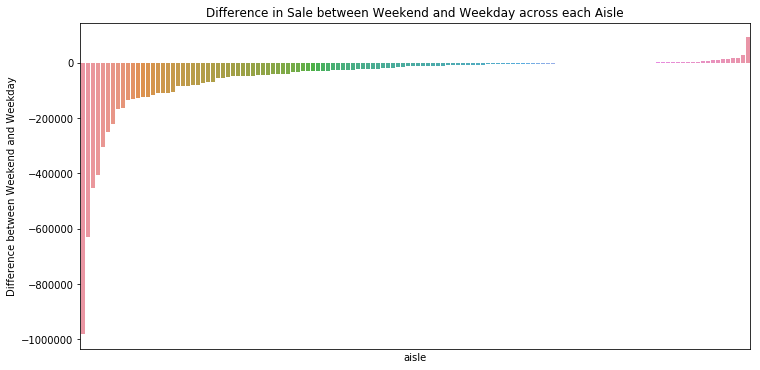

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'aisle',y = 'dif', data = aisle_dcp).set(xticks=[])
plt.title('Difference in Sale between Weekend and Weekday across each Aisle')
plt.xlabel('aisle')
plt.ylabel('Difference between Weekend and Weekday')

# Question_2 
# Which variable will affect the ratio of reordering and how?

### The variables we are interested in are order_dow, order_hour_of_day, department, add_to_cart_order, order_number, and day_since_last_order.

In [19]:
alltab.head()

,aisle_id,aisle,product_id,product_name,department_id,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department
0,1,prepared soups salads,209,Italian Pasta Salad,20,94246,5,0,114082,prior,26,0,20,1.0,deli
1,1,prepared soups salads,22853,Pesto Pasta Salad,20,94246,4,0,114082,prior,26,0,20,1.0,deli
2,13,prepared meals,10089,Dolmas,20,94246,25,0,114082,prior,26,0,20,1.0,deli
3,13,prepared meals,19687,Butternut Squash With Cranberries,20,94246,6,0,114082,prior,26,0,20,1.0,deli
4,1,prepared soups salads,209,Italian Pasta Salad,20,192465,2,1,119977,prior,2,0,16,3.0,deli


### From the heatmap below, we know that there is a strong relationship between reorder ratio and time. Additionally, people tend to reorder on Tuesday, from 6 AM to 9 AM.

In [20]:
time_re = pd.merge(pd.concat([order_products_prior_df, order_products_train_df]), orders_df, on = 'order_id')[['order_dow','order_hour_of_day','reordered']]

In [21]:
time_re.head()

,order_dow,order_hour_of_day,reordered
0,5,9,1
1,5,9,1
2,5,9,0
3,5,9,1
4,5,9,0


In [22]:
time_re = time_re.groupby(['order_dow', 'order_hour_of_day']).reordered.mean().reset_index()

In [23]:
time_re.head()

,order_dow,order_hour_of_day,reordered
0,0,0,0.576550
1,0,1,0.553474
2,0,2,0.554843
3,0,3,0.568533
4,0,4,0.548804


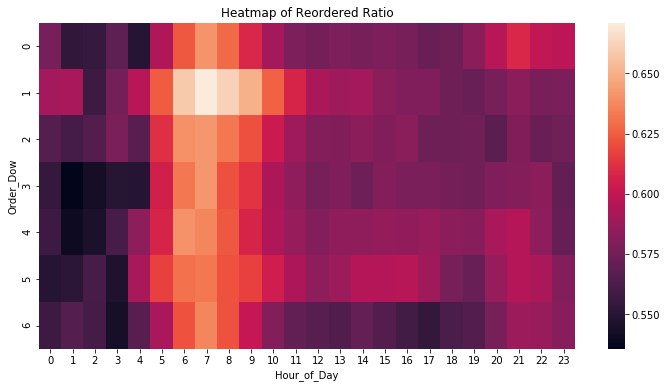

In [24]:
time_re = time_re.pivot('order_dow','order_hour_of_day','reordered')
plt.figure(figsize=(12,6))
sns.heatmap(time_re)
plt.xlabel('Hour_of_Day')
plt.ylabel('Order_Dow')
plt.title('Heatmap of Reordered Ratio')
plt.show()

### From the rank of reorder ratio below, we know that there is a strong relationship between department and reorder ratio. Top 3 departments with reorder ratio are diary egg, beverage and produce.

In [25]:
department_re = pd.merge(pd.merge(pd.concat([order_products_prior_df, order_products_train_df]), products_df, on = 'product_id'),\
                        departments_df, on = 'department_id')

In [26]:
department_re.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,dairy eggs


In [27]:
department_re = department_re.groupby('department').reordered.mean().reset_index()

In [28]:
department_re.sort_values('reordered', ascending=False)

,department,reordered
7,dairy eggs,0.670161
3,beverages,0.653651
19,produce,0.650521
2,bakery,0.628381
8,deli,0.608130
18,pets,0.602557
1,babies,0.577680
5,bulk,0.577090
20,snacks,0.574464
0,alcohol,0.571221


### According to the plot below, we know there is also a strong relationship between add_to_cart_order and reordered ratio. The correlation is negative when the order is between 1 to 50, and start to fluctuate after that.

In [29]:
add_re = pd.concat([order_products_prior_df, order_products_train_df]).groupby('add_to_cart_order').\
        reordered.mean().reset_index()

In [30]:
add_re.head()

,add_to_cart_order,reordered
0,1,0.679302
1,2,0.677135
2,3,0.658426
3,4,0.637350
4,5,0.617598


Text(0,0.5,'Reordered Ratio')

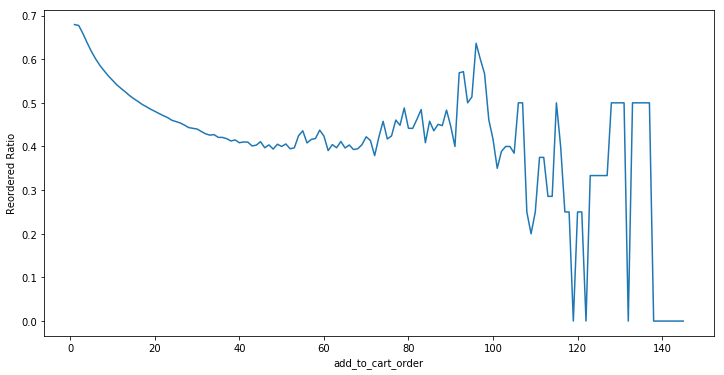

In [31]:
plt.figure(figsize=(12,6))
plt.plot(add_re.add_to_cart_order, add_re.reordered)
plt.xlabel('add_to_cart_order')
plt.ylabel('Reordered Ratio')

### Follow the similar procedure, we get the plot for order_number and day_since_prior_order as below. We can know that, generally, higher the days_since_prior_order and order_number are, higher the reorder ratio will be. 

In [32]:
order_re = pd.merge(pd.concat([order_products_prior_df, order_products_train_df]),\
                    orders_df, on = 'order_id').reset_index()

In [33]:
order_re1 = order_re.groupby(['order_number', 'days_since_prior_order']).reordered.mean().reset_index()

In [34]:
order_re1.head()

,order_number,days_since_prior_order,reordered
0,2,0.0,0.576396
1,2,1.0,0.184899
2,2,2.0,0.168029
3,2,3.0,0.191582
4,2,4.0,0.220610


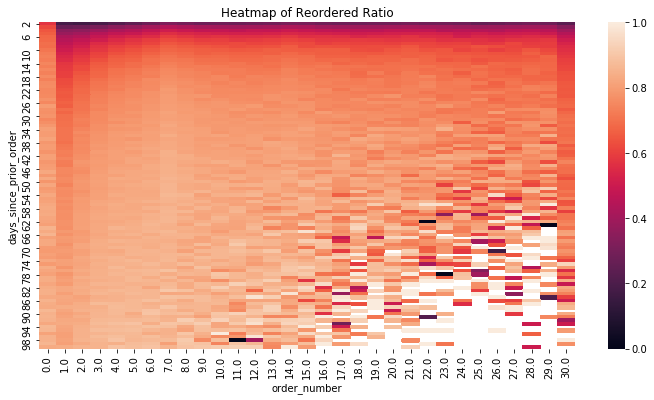

In [35]:
order_re_pivot = order_re1.pivot('order_number','days_since_prior_order','reordered')
plt.figure(figsize=(12,6))
sns.heatmap(order_re_pivot)
plt.xlabel('order_number')
plt.ylabel('days_since_prior_order')
plt.title('Heatmap of Reordered Ratio')
plt.show()

# Question 3
# Can customers be divided into different groups according to their purchase records?

### Because there are too many products, we choose to base our clustering on aisles.  

In [36]:
len(alltab['aisle'].unique())

134

### Because even the number of aisles are too many, we use PCA to reduce the dimensions to make it easier for clustering. To do this, we need to first create a crosstable with data of aisles, user_id and the count of observation in middle.

In [37]:
cross_alltab = pd.crosstab(alltab.user_id, alltab.aisle)
cross_alltab.head(5)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [38]:
cross_alltab.shape

(206209, 134)

### Implement PCA and make the scree plot. Because we find the elbow in pc4, we choose the first 4 PCs to implement clustering in order to exclude the noise. Additionally, we choose first 3 PCs to visualize the result.

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pca.fit(cross_alltab)
pca_samples = pca.transform(cross_alltab)

Text(0,0.5,'Percent of variance explained')

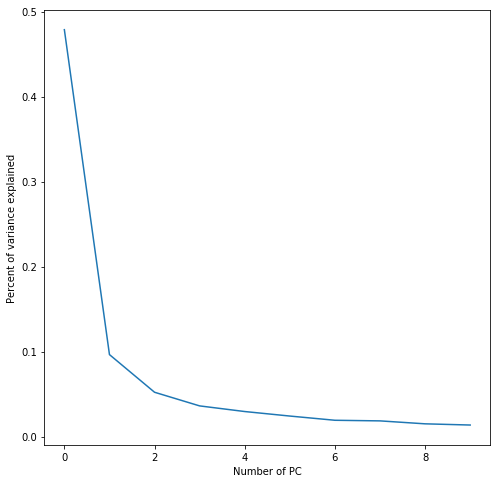

In [40]:
fig = plt.figure(figsize=(8,8))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of PC')
plt.ylabel('Percent of variance explained')

In [41]:
ps = pd.DataFrame(pca_samples)
forcluster = ps[[0,1,2,3]]

In [42]:
forcluster.shape

(206209, 4)

### We choose PC1, PC2 and PC3 to visualize the PCA result.

In [43]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


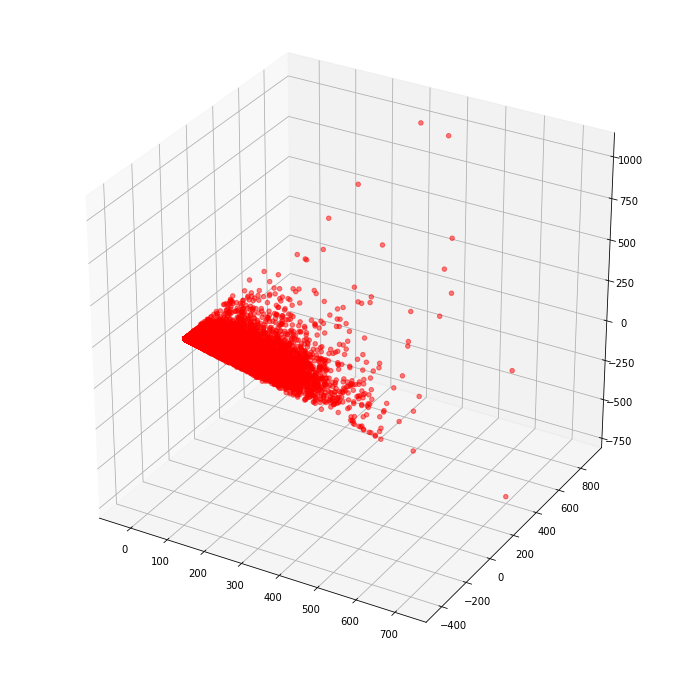

In [44]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.scatter(ps[0],ps[1],ps[2],'o',color='red', alpha=0.5, label='')

plt.legend()
plt.show()

### Base on the first 4 PC we implement KMeans clustering.

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
clusterer = KMeans(n_clusters=4, random_state=100).fit(forcluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(forcluster)
print(centers)

[[ -1.97945259e+01  -3.24694247e-01  -2.95693600e-01   6.52661007e-01]
 [  2.05770061e+01   2.80741770e-01   1.27246991e+00  -2.22510161e+00]
 [  2.19278442e+02  -1.06898846e+01  -3.11879516e+00   6.72402643e+00]
 [  9.24902258e+01   5.49456344e+00   1.92193373e-01  -2.13107453e+00]]


In [46]:
print(c_preds[0:100])

[0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 3 0 0 0 3 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 3 1 0 1 1 1 0 0 0 0 0 0 0 1 0]


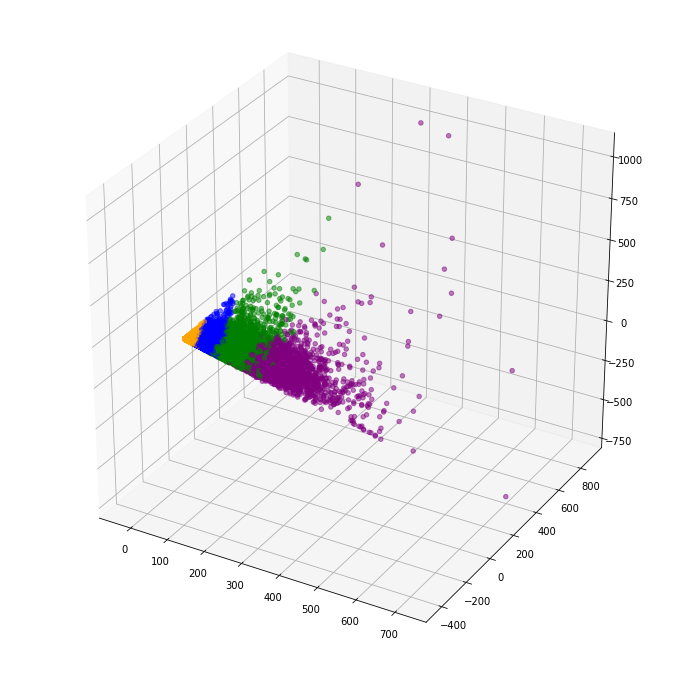

In [47]:
import matplotlib
fig = plt.figure(figsize=(12,12))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]

ax = fig.gca(projection='3d')
ax.scatter(ps[0],ps[1],ps[2],'o', color=colored, alpha=0.5, label='')


plt.legend()
plt.show()

### Here we print the center point of the clusters and find that all of the clusters have high demand of fresh fruits, fresh vegetable, package vegetables fruits, yogurt, etc. which are basic need for everyone. PC3(c2) features with baby formula which indicate that this cluster may be parents of small baby.

In [48]:
clust_prod = cross_alltab.copy()
clust_prod['cluster'] = c_preds

In [49]:
c0 = clust_prod[clust_prod['cluster'] == 0].drop('cluster', axis = 1).mean()
c1 = clust_prod[clust_prod['cluster'] == 1].drop('cluster', axis = 1).mean()
c2 = clust_prod[clust_prod['cluster'] == 2].drop('cluster', axis = 1).mean()
c3 = clust_prod[clust_prod['cluster'] == 3].drop('cluster', axis = 1).mean()

In [50]:
c0.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     6.250173
fresh vegetables                 5.633114
packaged vegetables fruits       3.380528
yogurt                           2.779490
water seltzer sparkling water    2.428808
packaged cheese                  2.199257
milk                             1.939902
chips pretzels                   1.921882
ice cream ice                    1.495819
soft drinks                      1.416189
dtype: float64

In [51]:
c1.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     29.950209
fresh vegetables                 29.662398
packaged vegetables fruits       15.022337
yogurt                           11.994349
packaged cheese                   8.119422
milk                              7.108775
water seltzer sparkling water     6.831126
chips pretzels                    5.935293
soy lactosefree                   5.435341
refrigerated                      4.799864
dtype: float64

In [52]:
c2.sort_values(ascending=False)[0:10]

aisle
fresh fruits                  156.776201
fresh vegetables              155.246179
packaged vegetables fruits     67.393559
yogurt                         51.218614
packaged cheese                31.153384
milk                           29.783297
soy lactosefree                19.668395
bread                          18.215884
baby food formula              18.067959
chips pretzels                 17.126910
dtype: float64

In [53]:
c3.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     77.140167
fresh vegetables                 68.742784
packaged vegetables fruits       34.798328
yogurt                           30.187641
packaged cheese                  18.031116
milk                             17.097492
water seltzer sparkling water    13.059251
chips pretzels                   11.826463
soy lactosefree                  11.810542
bread                            10.584806
dtype: float64

# Question 4
# How to predict customers' next order base on previous orders?

### As I mention before, we have two types of customer(train and test) with order type either being prior and train or prior and test. We will build model on the relationship between prior order and train order, then use this model to predict whether the product in test order will be reordered or not.
### Before building the model, there is a great amount of work in data preparation.

### Because there are two many products, aisles and departments, it is not convenient to use them as features to build model. 
### There are only 6 meaningful features: add_to_cart_order, reordered, order_number, order_dow, order_hour_of_day, day_since_prior_order.
### We will extract the observation with 'train' tag and 'test' tag as train and test dataset. However, before doing that, in order to include the information of order with 'prior' tag(previous order), we need to use some aggregation function to create some new features from 'prior' order.

### 1. Prepare original dataset for model

In [4]:
data = pd.merge(pd.concat([order_products_prior_df, order_products_train_df]),\
                orders_df, on = 'order_id', how = 'right')
data = pd.merge(data, products_df, on = 'product_id', how = 'left')

In [ ]:
del order_products_prior_df
del order_products_train_df
del products_df
del orders_df
del aisles_df
del departments_df

### 2. Check missing value and find all the meaningful features has no missing value, so we do not need to worry about it.

In [9]:
data.isnull().sum()

order_id                        0
product_id                  75000
add_to_cart_order           75000
reordered                   75000
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_name                75000
aisle_id                    75000
department_id               75000
dtype: int64

In [10]:
len(data)

33894106

In [5]:
data['days_since_prior_order'].fillna(data['days_since_prior_order'].mean(), inplace = True)

### 3. Split data set into training and testing.

In [ ]:
user_test = data[data['eval_set']=='test'].user_id
user_train = data[data['eval_set']=='train'].user_id

In [ ]:
prior_test = data[data.user_id.isin(user_test)]
priot_test = prior_test[prior_test['eval_set']=='prior']
prior_train = data[data.user_id.isin(user_train)]
priot_train = prior_train[prior_train['eval_set']=='prior']

In [ ]:
del user_test
del user_train

### 4. Use aggregation function on continuous and catogorical variables.

In [ ]:
cnt_test = prior_test.groupby(['user_id', 'product_id']).\
    agg({'order_number':['mean', 'min', 'max'],\
         'add_to_cart_order':['mean','min','max'],\
         'reordered':'mean', 'order_number':['mean','min','max'],\
         'days_since_prior_order':['mean', 'min', 'max']})
cnt_train = prior_train.groupby(['user_id', 'product_id']).\
    agg({'order_number':['mean', 'min', 'max'],\
         'add_to_cart_order':['mean','min','max'],\
         'reordered':'mean', 'order_number':['mean','min','max'],\
         'days_since_prior_order':['mean', 'min', 'max']})

In [ ]:
cnt_test.columns = ["_".join(x) for x in cnt_test.columns.ravel()]
cnt_test = cnt_test.reset_index()
cnt_train.columns = ["_".join(x) for x in cnt_train.columns.ravel()]
cnt_train = cnt_train.reset_index()

In [16]:
cnt_test.head()

,user_id,product_id,order_number_mean,order_number_min,order_number_max,add_to_cart_order_mean,add_to_cart_order_min,add_to_cart_order_max,reordered_mean,days_since_prior_order_mean,days_since_prior_order_min,days_since_prior_order_max
0,3,248.0,2.000000,2,2,3.000000,3.0,3.0,0.000000,9.000000,9.0,9.0
1,3,1005.0,10.000000,10,10,5.000000,5.0,5.0,0.000000,17.000000,17.0,17.0
2,3,1819.0,5.666667,4,7,2.666667,1.0,5.0,0.666667,11.333333,7.0,20.0
3,3,7503.0,3.000000,3,3,6.000000,6.0,6.0,0.000000,21.000000,21.0,21.0
4,3,8021.0,2.000000,2,2,5.000000,5.0,5.0,0.000000,9.000000,9.0,9.0


In [17]:
cnt_test.shape

(4833292, 12)

In [ ]:
prior_test.loc[:,'order_dow']=prior_test.loc[:,'order_dow'].astype('category')
prior_test.loc[:,'order_hour_of_day']=prior_test.loc[:,'order_hour_of_day'].astype('category')
prior_train.loc[:,'order_dow']=prior_train.loc[:,'order_dow'].astype('category')
prior_train.loc[:,'order_hour_of_day']=prior_train.loc[:,'order_hour_of_day'].astype('category')

In [ ]:
cat_test = pd.get_dummies(prior_test[['order_dow', 'order_hour_of_day']], prefix = ['dow','hour'])
cat_test = pd.merge(prior_test[['user_id','product_id']], cat_test, left_index = True, right_index = True)
cat_train = pd.get_dummies(prior_train[['order_dow', 'order_hour_of_day']], prefix = ['dow','hour'])
cat_train = pd.merge(prior_train[['user_id','product_id']], cat_train, left_index = True, right_index = True)

In [ ]:
del prior_test
del prior_train

In [ ]:
cat_test = cat_test.groupby(['user_id','product_id']).mean()
cat_test = cat_test.reset_index()

cat_train = cat_train.groupby(['user_id','product_id']).mean()
cat_train = cat_train.reset_index()

In [21]:
cat_test.head()

,user_id,product_id,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,hour_0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3,248.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0
1,3,1005.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,3,1819.0,0.666667,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.333333,0.333333,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
3,3,7503.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,3,8021.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0


In [22]:
cat_test.shape

(4833292, 33)

### 5. Merge additional features with training and testing set.

In [ ]:
train = data[data['eval_set']=='train'][['reordered','user_id','product_id','order_id']]
test = data[data['eval_set']=='test'][['reordered','user_id','product_id','order_id']]

In [ ]:
addtional_test = pd.merge(cnt_test, cat_test, on = ['user_id', 'product_id'])
addtional_train = pd.merge(cnt_train, cat_train, on = ['user_id', 'product_id'])

In [ ]:
del cnt_test
del cnt_train
del cat_test
del cat_train

In [25]:
addtional_test.shape

(4833292, 43)

In [ ]:
test = pd.merge(addtional_test, test, how = 'left',\
                 on = 'user_id')
train = pd.merge(addtional_train, train, how = 'left',\
                 left_on = ['user_id', 'product_id'], right_on = ['user_id', 'product_id'])

### 8. Fill the observations with products not bought in training order with 'reordered = 0'.

In [ ]:
train['reordered'].fillna(0, inplace = True)

In [28]:
train.head()

,user_id,product_id,order_number_mean,order_number_min,order_number_max,add_to_cart_order_mean,add_to_cart_order_min,add_to_cart_order_max,reordered_mean,days_since_prior_order_mean,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,reordered,order_id
0,1,196,6.0,1,11,1.363636,1.0,4.0,0.909091,18.307058,...,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1187899.0
1,1,10258,6.5,2,11,3.600000,2.0,6.0,0.900000,19.000000,...,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1187899.0
2,1,10326,5.0,5,5,5.000000,5.0,5.0,0.000000,28.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,12427,5.5,1,10,3.300000,1.0,9.0,0.900000,18.737763,...,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1,13032,7.5,2,11,6.500000,5.0,8.0,0.750000,19.750000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1187899.0


In [ ]:
from sklearn.model_selection import train_test_split
trSet, valSet = train_test_split(train, test_size=0.2)

In [30]:
trSet.columns

Index(['user_id', 'product_id', 'order_number_mean', 'order_number_min',
       'order_number_max', 'add_to_cart_order_mean', 'add_to_cart_order_min',
       'add_to_cart_order_max', 'reordered_mean',
       'days_since_prior_order_mean', 'days_since_prior_order_min',
       'days_since_prior_order_max', 'dow_0', 'dow_1', 'dow_2', 'dow_3',
       'dow_4', 'dow_5', 'dow_6', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'reordered', 'order_id'],
      dtype='object')

In [ ]:
# delete irrelevant columns
tr_data = trSet.drop(['product_id','user_id','order_id'],axis = 1)
val_data = valSet.drop(['product_id','user_id','order_id'],axis = 1)

In [32]:
X_train_sub = tr_data.drop('reordered', axis = 1)
y_train_sub = tr_data['reordered']
X_validation_sub = val_data.drop('reordered', axis = 1)
y_validation_sub = val_data['reordered']

### 6. Build model by GradientBoostingClassifier and find the optimal learning rate.

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [34]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb.fit(X_train_sub, y_train_sub)
    print('Learning rate: ', learning_rate)
    print('Accuracy score(training): {0:.3f}'.format(gb.score(X_train_sub, y_train_sub)))
    print('Accuracy score(validation): {0:.3f}'.format(gb.score(X_validation_sub, y_validation_sub)))
    print()

Learning rate:  0.05
Accuracy score(training): 0.908
Accuracy score(validation): 0.908

Learning rate:  0.1
Accuracy score(training): 0.908
Accuracy score(validation): 0.908

Learning rate:  0.25
Accuracy score(training): 0.909
Accuracy score(validation): 0.908

Learning rate:  0.5
Accuracy score(training): 0.909
Accuracy score(validation): 0.908

Learning rate:  0.75
Accuracy score(training): 0.907
Accuracy score(validation): 0.907

Learning rate:  1
Accuracy score(training): 0.905
Accuracy score(validation): 0.905



### 7. As we can see from the result above, when we choose learning_rate as 0.5, the validation accuracy is the highest, so we take it as our parameter. The prediction result is shown in the last dataframe.

In [35]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features='auto', max_depth = 10, random_state = 0)
gb.fit(X_train_sub, y_train_sub)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=10,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [36]:
X_test_sub = test.drop(['user_id', 'product_id_x', 'product_id_y', 'reordered', 'order_id'], axis = 1)

In [37]:
Predictions = gb.predict(X_test_sub)

In [38]:
Prd_df = pd.DataFrame(Predictions)
Prd_df = Prd_df.rename(index=str, columns={0: 'reordered'})

In [39]:
product_id = test[['order_id','product_id_x']]

In [40]:
# when you cannot merge two dataframe by index, you need to check whether the indices' datatypes are the same.
product_id.index = product_id.index.map(str)

In [41]:
submission = pd.merge(product_id, Prd_df, left_index=True, right_index=True, how = 'inner')

In [42]:
sub = submission[submission['reordered'] == 1]

In [43]:
sub.drop('reordered', axis = 1, inplace = True)

In [44]:
sub.product_id_x = sub.product_id_x.map(int).map(str)

In [45]:
sub = sub.groupby('order_id').agg({'product_id_x':lambda x: ' '.join(x)}).reset_index()

In [46]:
sub.columns = ['order_id', 'products']

In [47]:
sub.head()

,order_id,products
0,34,39180 47029
1,182,9337 13629 39275
2,257,49235
3,313,12779 25890 45007
4,386,15872 21479 24852 38281 39180 40759 42265 4506...


In [48]:
sub.to_csv('sub.csv', index=False)